# COMP 4211 PA1
# Lee Jae Yeol 20308109

## Outline of the Assignment
### 1. Data Preprocessing
### 2. Regression
### 3. Classification
> *  3.1 Feature Selection
> *  3.2 Logistic Regression
>> * 3.2.1 Single hidden layer Neural Networks
### 4. Performance Enhancement
> * 4.1 Hyperparameter Tuning
> * 4.2 Oversampling

## Computer Environment
**CPU** - Intel(R) Core(TM) i5-8250U CPU @ 1.60GHz

**Memory** - 8.00GB

**Python Version** - 3.7.9

In [98]:
from platform import python_version
print(python_version())

3.7.9


#  Part 1: Data Preprocessing

In [99]:
import pandas as pd

In [100]:
train = pd.read_csv('Data/train.csv')
test = pd.read_csv('Data/test.csv')

In [101]:
train.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol,label
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.9908,2.99,12.0,0
1,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.9947,3.14,9.7,0
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.9920,3.18,10.8,0
3,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.9912,3.54,12.4,1
4,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.0002,2.98,9.7,0


In [102]:
print("train.shape:", train.shape)
print("test.shape:", test.shape)

train.shape: (1620, 11)
test.shape: (400, 11)


To be specific, you need to remove the duplicates and fill in the missing values with the median value.

In [103]:
train.duplicated().sum()

3

In [104]:
train.drop_duplicates(inplace = True)   # to internally change

In [105]:
print("no_duplicate.train shape:", train.shape)

no_duplicate.train shape: (1617, 11)


In [106]:
train.isna().sum()

fixed acidity           2
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     1
total sulfur dioxide    0
density                 0
pH                      0
alcohol                 2
label                   0
dtype: int64

In [107]:
train['fixed acidity'].fillna(train['fixed acidity'].median(), inplace = True)
train['free sulfur dioxide'].fillna(train['free sulfur dioxide'].median(), inplace = True)
train['alcohol'].fillna(train['alcohol'].median(), inplace = True)

In [108]:
train.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
alcohol                 0
label                   0
dtype: int64

In [109]:
test.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
alcohol                 0
label                   0
dtype: int64

## [Q1]

In [110]:
train_copy = train.copy()
train.shape

(1617, 11)

visualize the correlation between every two of the 10 features with a heatmap.

In [111]:
import seaborn as sns

In [112]:
df_corr = train.iloc[:, :-1].corr()
df_corr

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
fixed acidity,1.000000,-0.003367,0.327437,0.083209,0.013834,-0.124943,0.031098,0.274368,-0.470075,-0.117942
volatile acidity,-0.003367,1.000000,-0.207364,0.049518,0.111354,-0.134712,0.072090,0.051793,-0.045057,0.001821
citric acid,0.327437,-0.207364,1.000000,0.180390,0.108521,0.111436,0.148888,0.217059,-0.254770,-0.110805
residual sugar,0.083209,0.049518,0.180390,1.000000,0.113669,0.326491,0.438311,0.812900,-0.185773,-0.408144
chlorides,0.013834,0.111354,0.108521,0.113669,1.000000,0.091636,0.233975,0.284564,-0.093655,-0.362875
free sulfur dioxide,-0.124943,-0.134712,0.111436,0.326491,0.091636,1.000000,0.626917,0.287382,0.015811,-0.222382
total sulfur dioxide,0.031098,0.072090,0.148888,0.438311,0.233975,0.626917,1.000000,0.569125,0.005768,-0.473946
density,0.274368,0.051793,0.217059,0.812900,0.284564,0.287382,0.569125,1.000000,-0.108155,-0.787852
pH,-0.470075,-0.045057,-0.254770,-0.185773,-0.093655,0.015811,0.005768,-0.108155,1.000000,0.124550
alcohol,-0.117942,0.001821,-0.110805,-0.408144,-0.362875,-0.222382,-0.473946,-0.787852,0.124550,1.000000


<AxesSubplot:>

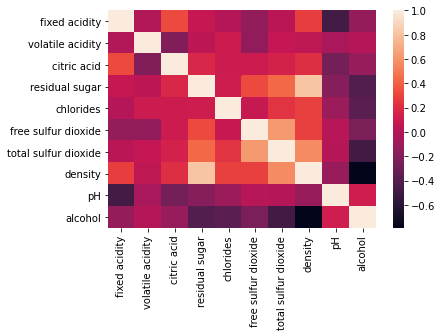

In [113]:
sns.heatmap(df_corr)

# Part 2: Regression

In [114]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

## [Q2 & Q3]

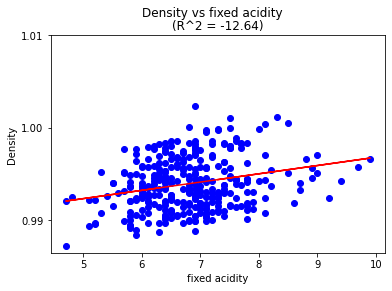

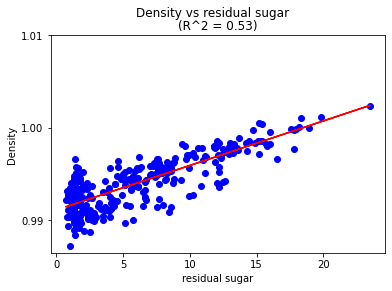

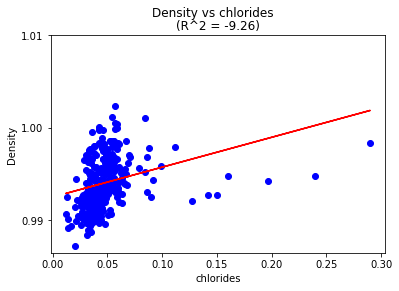

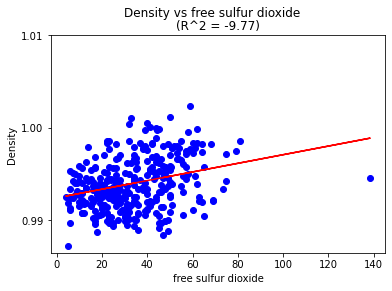

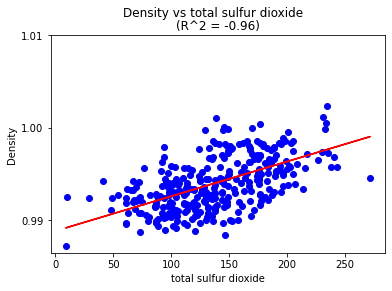

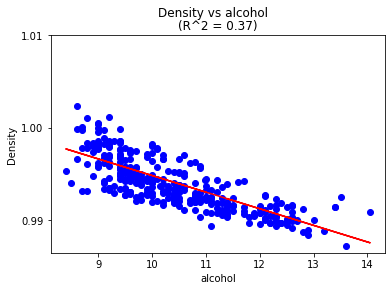

,features,R^2 score
0,fixed acidity,-12.638609
1,residual sugar,0.527534
2,chlorides,-9.261578
3,free sulfur dioxide,-9.774859
4,total sulfur dioxide,-0.955221
5,alcohol,0.365199
6,combination,0.933304


In [115]:
import warnings
warnings.filterwarnings("ignore")

columns = ['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol', 'combination']
evaluation_list = []

for feature in list(columns):
    
    if (feature == 'combination'):
        wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(
            train[['fixed acidity', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'alcohol']], 
            train['density'], test_size = 0.2, random_state = 4211)

    else:
        wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(
            train[[feature]], train['density'], test_size = 0.2, random_state = 4211)
        
    feature_lrm = LinearRegression()
    feature_lrm.fit(wine_x_train, wine_y_train)
    wine_y_predict = feature_lrm.predict(wine_x_test)
    accuracy = r2_score(wine_y_predict, wine_y_test) 
    
    if (feature == 'combination'):
        evaluation_list.append(accuracy)
        break
        
    # plotting the points
    plt.scatter(wine_x_test, wine_y_test, color = 'blue')
    plt.plot(wine_x_test, wine_y_predict, color = 'red')
    plt.yticks([0.99, 1.00, 1.01])
    plt.xlabel(feature)
    plt.ylabel('Density')
    plt.suptitle("Density vs " + feature)
    plt.title("(R^2 = %.2f)" %accuracy)             
    plt.show()
    evaluation_list.append(accuracy)
    
pd.DataFrame(list(zip(columns, evaluation_list)), columns = ['features', 'R^2 score'])    

# Part 3: Classification

In [116]:
train.iloc[:, :-1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,alcohol
0,8.1,0.27,0.41,1.45,0.033,11.0,63.0,0.99080,2.99,12.0
1,8.6,0.23,0.40,4.20,0.035,17.0,109.0,0.99470,3.14,9.7
2,7.9,0.18,0.37,1.20,0.040,16.0,75.0,0.99200,3.18,10.8
3,6.6,0.16,0.40,1.50,0.044,48.0,143.0,0.99120,3.54,12.4
4,8.3,0.42,0.62,19.25,0.040,41.0,172.0,1.00020,2.98,9.7
...,...,...,...,...,...,...,...,...,...,...
1612,6.2,0.41,0.22,1.90,0.023,5.0,56.0,0.98928,3.04,13.0
1613,6.8,0.22,0.36,1.20,0.052,38.0,127.0,0.99330,3.04,9.2
1614,6.5,0.23,0.38,1.30,0.032,29.0,112.0,0.99298,3.29,9.7
1615,6.6,0.32,0.36,8.00,0.047,57.0,168.0,0.99490,3.15,9.6


In [117]:
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.feature_selection import SelectKBest, chi2
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, f1_score, plot_confusion_matrix, plot_roc_curve

wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(train.iloc[:,:-1], train['label'], test_size = 0.2, random_state = 4211)

wine_x_train.shape

(1293, 10)

## 3.1 Feature Selection
## [Q4]

In [118]:
A = SelectKBest(score_func = chi2, k = 8).fit(wine_x_train, wine_y_train)
df = pd.DataFrame(list(zip(train.columns[:-1], A.scores_)), columns = ['features', 'Chi score'])

df.sort_values(by = 'Chi score', ascending = False)

,features,Chi score
6,total sulfur dioxide,1315.695788
3,residual sugar,198.105064
9,alcohol,70.569785
0,fixed acidity,3.231314
5,free sulfur dioxide,2.305043
1,volatile acidity,2.252629
4,chlorides,1.160100
8,pH,0.292732
2,citric acid,0.025408
7,density,0.002408


In [119]:
help(SGDClassifier)

Help on class SGDClassifier in module sklearn.linear_model._stochastic_gradient:

class SGDClassifier(BaseSGDClassifier)
 |  SGDClassifier(loss='hinge', *, penalty='l2', alpha=0.0001, l1_ratio=0.15, fit_intercept=True, max_iter=1000, tol=0.001, shuffle=True, verbose=0, epsilon=0.1, n_jobs=None, random_state=None, learning_rate='optimal', eta0=0.0, power_t=0.5, early_stopping=False, validation_fraction=0.1, n_iter_no_change=5, class_weight=None, warm_start=False, average=False)
 |  
 |  Linear classifiers (SVM, logistic regression, etc.) with SGD training.
 |  
 |  This estimator implements regularized linear models with stochastic
 |  gradient descent (SGD) learning: the gradient of the loss is estimated
 |  each sample at a time and the model is updated along the way with a
 |  decreasing strength schedule (aka learning rate). SGD allows minibatch
 |  (online/out-of-core) learning via the `partial_fit` method.
 |  For best results using the default learning rate schedule, the data sho

## 3.2 Logistic Regression
## [Q5]

In [120]:
scaler = StandardScaler()
train.iloc[:,:-1] = scaler.fit_transform(train.iloc[:,:-1])

wine_x_train, wine_x_test, wine_y_train, wine_y_test = train_test_split(train.iloc[:,[0,1,3,4,5,6,8,9]], train['label'], 
                                                                        test_size = 0.2, random_state = 4211)

# removing the critic acid and density features
print(wine_x_train.shape)
print(wine_x_test.shape)


(1293, 8)
(324, 8)


In [121]:
import time 

def model_training(model, time_list = [], accuracy_list = [], f1_list = []):
    start = time.time()
    model.fit(wine_x_train, wine_y_train)
    stop = time.time()
    #print(f"Model Training time: {stop - start}s")

    wine_y_predict = model.predict(wine_x_test)
    
    # store the accuracy and f1 scores for the validation set
    accuracy = accuracy_score(wine_y_predict, wine_y_test)
    f1 = f1_score(wine_y_predict, wine_y_test)
    
    time_list.append(stop-start)
    accuracy_list.append(accuracy)
    f1_list.append(f1)


In [126]:
def evaluation_set(models):
    
    time_list = []
    accuracy_list = []
    f1_list = []
    
    for model in models:
        model_training(model,time_list, accuracy_list, f1_list)

    result = pd.DataFrame(np.column_stack([time_list, accuracy_list, f1_list]), columns = ('time', 'accuracy', 'f1'))
    
    mean = result.mean(axis = 0)
    sd = result.std(axis = 0)
    
    # adding the mean and sd of each results
    result = result.append(mean, ignore_index = True)
    result = result.append(sd, ignore_index = True)
    
    result.rename(index = {3:"mean", 4:"sd"}, inplace = True)
    
    return (result)

### constant learning rate with eta0 = 1

In [127]:
lre1model1 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 1, learning_rate = 'constant', eta0 =1, verbose = 1)
lre1model2 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 2, learning_rate = 'constant', eta0 =1)
lre1model3 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 3, learning_rate = 'constant', eta0 =1)

evaluation_set({lre1model1, lre1model2, lre1model3})


,time,accuracy,f1
0,0.003991,0.790123,0.673077
1,0.002991,0.688272,0.530233
2,0.002991,0.783951,0.631579
mean,0.003325,0.754115,0.611629
sd,0.000577,0.057106,0.073482


### constant learning rate with eta0 = 0.1

In [128]:
lre01model1 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 1, learning_rate = 'constant', eta0 = 0.1, verbose = 0)
lre01model2 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 2, learning_rate = 'constant', eta0 =0.1)
lre01model3 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 3, learning_rate = 'constant', eta0 =0.1)

evaluation_set({lre01model1, lre01model2, lre01model3})

,time,accuracy,f1
0,0.003990,0.805556,0.709677
1,0.002959,0.817901,0.730594
2,0.002992,0.814815,0.700000
mean,0.003314,0.812757,0.713424
sd,0.000586,0.006425,0.015637


### constant learning rate with eta0 = 0.05

In [129]:
lre005model1 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 1, learning_rate = 'constant', eta0 =0.05, verbose = 0)
lre005model2 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 2, learning_rate = 'constant', eta0 =0.05)
lre005model3 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 3, learning_rate = 'constant', eta0 =0.05)

evaluation_set({lre005model1, lre005model2, lre005model3})

,time,accuracy,f1
0,0.004988,0.824074,0.710660
1,0.002992,0.827160,0.730769
2,0.002992,0.827160,0.735849
mean,0.003657,0.826132,0.725759
sd,0.001152,0.001782,0.013321


### adaptive learning rate

In [130]:
lrmodel1 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 1, learning_rate = 'adaptive', eta0 = 1, verbose = 0)
lrmodel2 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 2, learning_rate = 'adaptive', eta0 = 1, verbose = 0)
lrmodel3 = SGDClassifier(loss = 'log', penalty = 'none', random_state = 3, learning_rate = 'adaptive', eta0 = 1, verbose = 0)

evaluation_set({lrmodel1, lrmodel2, lrmodel3})

,time,accuracy,f1
0,0.010972,0.839506,0.742574
1,0.010022,0.839506,0.742574
2,0.009989,0.836420,0.736318
mean,0.010328,0.838477,0.740489
sd,0.000558,0.001782,0.003612


## [Q6]

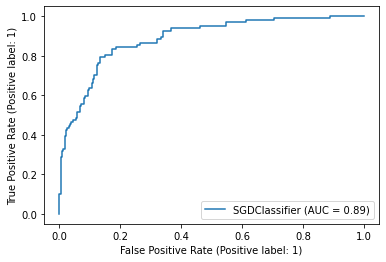

In [132]:
plot_roc_curve(lrmodel3, wine_x_test, wine_y_test)

ROC (receiver operating characteristic curve) provides a graphical illustration of how well the model is able to distinguish the binary class. The area under the curve, as known as AUC, represents the probability that the model will correctly classify. It also displays the tradeoff of true positive rate and false positive rate under different classification thresholds. 

## 3.3 Single-hidden-layer Neural Networks

In [31]:
from sklearn.neural_network import MLPClassifier
help(MLPClassifier)

Help on class MLPClassifier in module sklearn.neural_network._multilayer_perceptron:

class MLPClassifier(sklearn.base.ClassifierMixin, BaseMultilayerPerceptron)
 |  MLPClassifier(hidden_layer_sizes=(100,), activation='relu', *, solver='adam', alpha=0.0001, batch_size='auto', learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=200, shuffle=True, random_state=None, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True, early_stopping=False, validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10, max_fun=15000)
 |  
 |  Multi-layer Perceptron classifier.
 |  
 |  This model optimizes the log-loss function using LBFGS or stochastic
 |  gradient descent.
 |  
 |  .. versionadded:: 0.18
 |  
 |  Parameters
 |  ----------
 |  hidden_layer_sizes : tuple, length = n_layers - 2, default=(100,)
 |      The ith element represents the number of neurons in the ith
 |      hidden layer.
 |  
 |  activation : {'identity

## [Q7]

In [32]:
def mlp_randomstate(num_units):
    
    storage = []
    for i in range(3):
        storage.append(MLPClassifier(hidden_layer_sizes = (num_units,),
                                    solver = 'sgd', max_iter = 500, 
                                    early_stopping = True, 
                                    random_state = i))
    return storage

In [134]:
accuracy_result_table = []
f1_result_table = []

for h in range(8):
    a = mlp_randomstate(2**h)
    values = evaluation_set(a)
    display(values)
    print("single hidden layer with {} units".format(2**h))

    accuracy_result_table.append((values.loc['mean', 'accuracy']))
    f1_result_table.append((values.loc['mean', 'f1']))
   

,time,accuracy,f1
0,0.035904,0.302469,0.456731
1,0.050872,0.694444,0.000000
2,0.029920,0.314815,0.386740
mean,0.038898,0.437243,0.281157
sd,0.010792,0.222829,0.245991


single hidden layer with 1 units


,time,accuracy,f1
0,0.034943,0.299383,0.460808
1,0.220420,0.719136,0.533333
2,0.198428,0.787037,0.610169
mean,0.151264,0.601852,0.534770
sd,0.101335,0.264137,0.074691


single hidden layer with 2 units


,time,accuracy,f1
0,0.178522,0.774691,0.489510
1,0.288229,0.765432,0.627451
2,0.104720,0.500000,0.506098
mean,0.190490,0.680041,0.541020
sd,0.092338,0.155989,0.075310


single hidden layer with 4 units


,time,accuracy,f1
0,0.036901,0.638889,0.235294
1,0.247339,0.768519,0.663677
2,0.174533,0.774691,0.621762
mean,0.152924,0.727366,0.506911
sd,0.106870,0.076686,0.236159


single hidden layer with 8 units


,time,accuracy,f1
0,0.163563,0.783951,0.602273
1,0.308178,0.817901,0.706468
2,0.203453,0.743827,0.606635
mean,0.225065,0.781893,0.638458
sd,0.074691,0.037080,0.058938


single hidden layer with 16 units


,time,accuracy,f1
0,0.235347,0.805556,0.663102
1,0.233376,0.830247,0.712042
2,0.137633,0.814815,0.625000
mean,0.202118,0.816872,0.666714
sd,0.055855,0.012474,0.043633


single hidden layer with 32 units


,time,accuracy,f1
0,0.282245,0.848765,0.737968
1,0.244347,0.839506,0.720430
2,0.173536,0.811728,0.630303
mean,0.233376,0.833333,0.696234
sd,0.055179,0.019275,0.057767


single hidden layer with 64 units


,time,accuracy,f1
0,0.205451,0.833333,0.662500
1,0.538560,0.839506,0.729167
2,0.294214,0.820988,0.670455
mean,0.346075,0.831276,0.687374
sd,0.172504,0.009429,0.036412


single hidden layer with 128 units


## [Q8]

Single hidden layer with 64 units of neural network model performed the best. Comparing with the logistic regression model, the training time has significantly increased from 0.01 sec to 0.34 second. But the accuracy and f1 score has both decreased. This represents that for our dataset, a logistic regression model outperforms a single hidden layer neural network.

## [Q9]

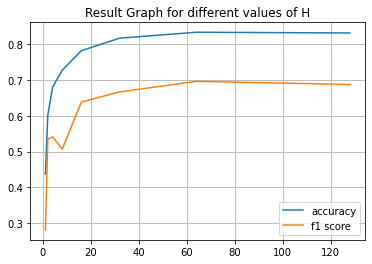

In [136]:
x = [2**t for t in range(8)]
plt.figure(figsize = (6,4))
plt.plot(x, accuracy_result_table, label = 'accuracy')
plt.plot(x,f1_result_table, label = 'f1 score')
plt.title("Result Graph for different values of H")
plt.legend()
plt.grid(True)
plt.show()

  Accuracy refers to the measure of all correctly identified cases in classification.  F1 score is calculated by the harmonic mean of precision and recall. While the accuracy for our single layer hidden NN is high (i.e. above 80%), the f1_score is bound under 70%.
  
   This represents that while our model is good at predicting the true positives and true negatives, it still has room for enhancement for incorrectly classified cases (i.e. precision and recall). 
  
Also, accuracy might be misleading evaluation method when the datasets are imbalanced, hence metric such as confusion matrix or F1 score might provide an objective evaluation of the model. 

## [Q10]

There is a trend of rapid increase in the scores as the hidden units increase, but as the number of hidden units go beyond 20, the scores increase at a very slow speed. 

This observation might be due to the reason that the model is reaching the ceiling of the maximum possible training with the data set given, especially when H goes over 40 ~ 60. It is plausible that with excess number of hidden units, it could lead to overfitting.

# Part 4: Performance Enhancement
## 4.1 Hyperparameter Tuning

In [152]:
from sklearn.model_selection import GridSearchCV

## [Q11]

In [137]:
#'hidden_layer_sizes': (10,10,10) if you want 3 hidden layers with 10 hidden units each.

from sklearn.model_selection import GridSearchCV

param_dist = {
    'hidden_layer_sizes':[(10,), (50,), (100,)],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [1e-3, 5e-2],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}
# single layer neural network
slnn = MLPClassifier(random_state = 4211, early_stopping = True)
gridcv = GridSearchCV(slnn, param_grid = param_dist, cv =5, verbose = 3)

gridcv.fit(wine_x_train, wine_y_train)


Fitting 5 folds for each of 48 candidates, totalling 240 fits
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.2s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 4/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.0s
[CV 2/5] END activation=relu, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solve

[CV 2/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 3/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.1s
[CV 4/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 5/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 1/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 2/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 3/5] END activation=relu, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 4/5] END activation=relu, hidden_

[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.1s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.1s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(10,), learning_rate=constant, learning_rate_init=0.001, solver=sgd; total time=   0.0s
[CV 4/5] END activation=tanh, hidden_

[CV 2/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 4/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.1s
[CV 5/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=adam; total time=   0.0s
[CV 1/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.2s
[CV 2/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 3/5] END activation=tanh, hidden_layer_sizes=(50,), learning_rate=adaptive, learning_rate_init=0.001, solver=sgd; total time=   0.3s
[CV 4/5] END activation=tanh, hidden_

GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, random_state=4211),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['adam', 'sgd']},
             verbose=3)

## [Q12]

In [138]:
def report(results, n_top = 5):
    for i in range(1, n_top + 1):
        rankers = np.flatnonzero(results['rank_test_score'] == i)
        for ranker in rankers:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][ranker],
                          results['std_test_score'][ranker]))
            print("Parameters: {0}".format(results['params'][ranker]))
            print("")
            
report(gridcv.cv_results_ , n_top = 3)

Model with rank: 1
Mean validation score: 0.862 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'solver': 'adam'}

Model with rank: 1
Mean validation score: 0.862 (std: 0.032)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.855 (std: 0.025)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'solver': 'adam'}

Model with rank: 3
Mean validation score: 0.855 (std: 0.025)
Parameters: {'activation': 'relu', 'hidden_layer_sizes': (50,), 'learning_rate': 'adaptive', 'learning_rate_init': 0.05, 'solver': 'adam'}



checking for verification 

In [142]:
print(gridcv.best_params_)
gridcv.score(wine_x_test, wine_y_test)

{'activation': 'relu', 'hidden_layer_sizes': (100,), 'learning_rate': 'constant', 'learning_rate_init': 0.05, 'solver': 'adam'}


0.8395061728395061

## [Q13]

You need to import test.csv as a data frame and standardize the features using the statistics you used for the training data. (pa1 description)

In [143]:
# train_copy = train.copy()

X_train = train_copy.iloc[:,[0,1,3,4,5,6,8,9]]

test = pd.read_csv('Data/test.csv')
X_testset = test.iloc[:, [0,1,3,4,5,6,8,9]]
y_testset = test.iloc[:, 10]

# standardize the test set using the statistics(mean, std) from the training data
colmean = X_train.mean(axis = 0)
colstd = X_train.std(axis = 0)

for i in range(X_testset.shape[1]):
    X_testset.iloc[:, i] = (X_testset.iloc[:, i] - colmean[i]) / colstd[i]


In [144]:
X_testset.head(5)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol
0,-0.077101,1.360386,-0.202527,-0.556232,-0.360867,0.411881,-0.526094,1.574344
1,-0.418045,-0.138137,0.790891,0.792532,1.556129,0.960820,-0.265425,-1.169256
2,0.832084,1.977425,1.660132,-0.516562,0.161950,0.411881,-0.330592,1.090179
3,0.945732,-1.284067,-0.968287,-0.714910,-1.406501,-1.692384,1.037922,-0.281621
4,-0.986285,2.285945,-0.306008,0.237158,-0.999866,-0.274293,0.321081,-1.088562


              precision    recall  f1-score   support

         0.0       0.90      0.91      0.90       260
         1.0       0.83      0.81      0.82       140

    accuracy                           0.88       400
   macro avg       0.86      0.86      0.86       400
weighted avg       0.87      0.88      0.87       400



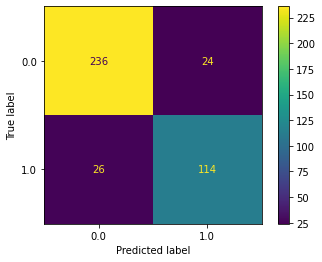

In [145]:
from sklearn.metrics import classification_report, plot_confusion_matrix

y_pred = gridcv.predict(X_testset)
print(classification_report(y_testset, y_pred))

# confusion matrix
plot_confusion_matrix(gridcv, X_testset, y_testset)

# 7.2 Oversampling

Randomly oversample from the minority class and add these examples to the training set so that the two classes will become balanced in size. (pa1 description)

## [Q14]

1. Instead of oversampling, we can perform undersampling. If we have sufficient data such that we can discard some, we can undersample some data from the majority class. We can perform undersampling till we have a reasonable proportion of data between classes.


2. Another well-known method for revising imbalanced class classification is to use SMOTE, short for Synthetic Minority Oversampling. SMOTE is performed by selecting k nearest neighbors of data, and making a new sample within the colinear lines. The implementation has an advantage of synthesizing data points that are feasible. 

# [Q15]

In [146]:
X_train['label'] = train_copy['label']
X_train.head(3)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,label
0,8.1,0.27,1.45,0.033,11.0,63.0,2.99,12.0,0
1,8.6,0.23,4.20,0.035,17.0,109.0,3.14,9.7,0
2,7.9,0.18,1.20,0.040,16.0,75.0,3.18,10.8,0


In [147]:
label0 = len(X_train[X_train['label'] == 0])
label1 = len(X_train[X_train['label'] == 1])

print("num of label 0 wine:", label0)
print("num of label 0 wine:", label1)
oversamples = X_train[X_train['label'] == 1].sample(n = label0 - label1, random_state = 4211)
oversamples.shape

# or we can just use from sklearn.utils import resample

num of label 0 wine: 1068
num of label 0 wine: 549


(519, 9)

performing standardization for the modified dataset.

In [148]:
X_train = X_train.append(oversamples)
print(X_train.shape)

test = pd.read_csv('Data/test.csv')
X_testset = test.iloc[:, [0,1,3,4,5,6,8,9]]
y_testset = test.iloc[:, 10]

colmean = X_train.iloc[:, : -1].mean(axis = 0)
colstd = X_train.iloc[:, : -1].std(axis = 0)

for i in range(X_testset.shape[1]):
    X_testset.iloc[:, i] = (X_testset.iloc[:, i] - colmean[i]) / colstd[i]

scaler = StandardScaler()
X_train.iloc[:,:-1] = scaler.fit_transform(X_train.iloc[:,:-1])

(2136, 9)


In [149]:
X_train.head(3)

,fixed acidity,volatile acidity,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,pH,alcohol,label
0,1.495572,-0.164389,-0.907807,-0.511631,-1.413337,-1.709601,-1.360931,1.004368,0
1,2.081952,-0.530441,-0.313473,-0.424562,-1.047714,-0.602848,-0.390028,-0.770958,0
2,1.261019,-0.988006,-0.961838,-0.206890,-1.108651,-1.420883,-0.131120,0.078111,0


performing grid search with the same hyperparameters for the modified dataset.

In [150]:
param_dist = {
    'hidden_layer_sizes':[(10,), (50,), (100,)],
    'learning_rate': ['constant', 'adaptive'],
    'learning_rate_init': [1e-3, 5e-2],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
}

oversampled_slnn = MLPClassifier(random_state = 4211, early_stopping = True)
oversampled_gridcv = GridSearchCV(oversampled_slnn, param_grid = param_dist, cv =5, verbose = 1)

oversampled_gridcv.fit(X_train.iloc[:, :-1], X_train.iloc[:,-1])


Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5,
             estimator=MLPClassifier(early_stopping=True, random_state=4211),
             param_grid={'activation': ['relu', 'tanh'],
                         'hidden_layer_sizes': [(10,), (50,), (100,)],
                         'learning_rate': ['constant', 'adaptive'],
                         'learning_rate_init': [0.001, 0.05],
                         'solver': ['adam', 'sgd']},
             verbose=1)

              precision    recall  f1-score   support

         0.0       0.92      0.84      0.88       260
         1.0       0.74      0.87      0.80       140

    accuracy                           0.85       400
   macro avg       0.83      0.85      0.84       400
weighted avg       0.86      0.85      0.85       400



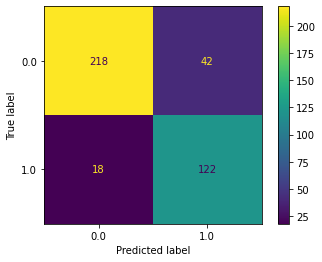

In [151]:
y_pred = oversampled_gridcv.predict(X_testset)
print(classification_report(y_testset, y_pred))

# confusion matrix
plot_confusion_matrix(oversampled_gridcv, X_testset, y_testset)

# [Q16]

After performing oversampling, the number of correct prediction for class 1 has increased. However, while the score for recall has improved, the precision has decreased. We can observe that due to the effect of oversampling, our model is guessing more class 1 label than before, which simultaneously inevitably increases the number of incorrect predictions of class 1 label. Therefore there seems to be a tradeoff between precision and recall and a decrease in f1-score. 